In [1]:
"""Used the following website to help with reading CSV files: 
https://www.geeksforgeeks.org/python/how-to-read-from-a-file-in-python/"""

import csv 

#getting quaternino data from first IMU sensor

with open("Quaternions_sensor_1_result4.csv", newline='') as csvfile:

    csvreader = csv.reader(csvfile)
    sensor1 = []
    for row in csvreader:
        sensor1.append(row)

#only getting from the third row onwards (first rows are header, serial number etc.)    
sensor_1_clean_data = sensor1[3:]
print(sensor_1_clean_data)

[['07/16/2025 13:22:20.925', '-0.7399876', '0.614466', '-0.2736026', '-0.01531121', '3'], ['07/16/2025 13:22:21.025', '-0.7292148', '0.62708', '-0.2710789', '-0.04214013', '3'], ['07/16/2025 13:22:21.125', '-0.7197639', '0.6374049', '-0.2702036', '-0.05374059', '3'], ['07/16/2025 13:22:21.225', '-0.7156857', '0.6410176', '-0.2715056', '-0.05846563', '3'], ['07/16/2025 13:22:21.325', '-0.7113178', '0.644456', '-0.2757062', '-0.05415336', '3'], ['07/16/2025 13:22:21.425', '-0.7021282', '0.6423964', '-0.3071343', '-0.0159879', '3'], ['07/16/2025 13:22:21.525', '-0.6935238', '0.6360702', '-0.3385894', '-0.006291787', '3'], ['07/16/2025 13:22:21.625', '-0.7002158', '0.6355441', '-0.3229955', '-0.04121685', '3'], ['07/16/2025 13:22:21.725', '-0.6851081', '0.6534892', '-0.3161245', '-0.06235764', '3'], ['07/16/2025 13:22:21.825', '-0.6631587', '0.680925', '-0.293049', '-0.1045308', '3'], ['07/16/2025 13:22:21.925', '-0.6418247', '0.6993116', '-0.2885348', '-0.12655', '3'], ['07/16/2025 13:22:

In [2]:
#getting quaternion data from second IMU sensor

with open("Quaternions_sensor_2_result4.csv", newline='') as csvfile:

    csvreader = csv.reader(csvfile, delimiter='\t')
    sensor2 = []
    for row in csvreader:
        sensor2.append(row)
        
sensor_2_clean_data = sensor2[3:]
print(sensor_2_clean_data)

[['07/16/2025 13:22:20.925', '-0.1603319', '0.9716489', '-0.1614889', '0.06600583', '2'], ['07/16/2025 13:22:21.025', '-0.1503461', '0.9717059', '-0.17219', '0.06146039', '2'], ['07/16/2025 13:22:21.125', '-0.1471753', '0.9708124', '-0.1803203', '0.05991945', '2'], ['07/16/2025 13:22:21.225', '-0.1431182', '0.9720935', '-0.1776863', '0.05676366', '2'], ['07/16/2025 13:22:21.325', '-0.1569796', '0.9671184', '-0.1897644', '0.0653634', '2'], ['07/16/2025 13:22:21.425', '-0.2001337', '0.9480748', '-0.2384026', '0.06714809', '3'], ['07/16/2025 13:22:21.525', '-0.2198945', '0.9401563', '-0.253652', '0.06046622', '2'], ['07/16/2025 13:22:21.625', '-0.2197357', '0.9400979', '-0.2508765', '0.07236274', '2'], ['07/16/2025 13:22:21.725', '-0.2205786', '0.9505875', '-0.2105907', '0.06024317', '2'], ['07/16/2025 13:22:21.825', '-0.2053536', '0.9719595', '-0.1086798', '0.03945116', '2'], ['07/16/2025 13:22:21.925', '-0.2081745', '0.9735403', '-0.08001535', '0.05219778', '2'], ['07/16/2025 13:22:22.0

In [3]:
import numpy as np

#function for multiplying two quaternions
def multiply_quaternions(q1,q2):
    w1,x1,y1,z1 = q1
    w2,x2,y2,z2 = q2

    return[
        w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2,
        w1 * w2 + x1 * w2 + y1 * z2 - z1 * y2,
        w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2,
        w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    ]

def quaternion_to_angle(sensor_array_1, sensor_array_2):

    angles_from_quaternions = []
    counter = 0

    for i in sensor_array_1:
        w1,x1,y1,z1 = float(i[1]), float(i[2]),float(i[3]), float(i[4])
        q1_conjugate = [w1, -x1, -y1, -z1]
        angle_calculated = False
        
        while angle_calculated == False and counter <len(sensor_array_2):
            k = sensor_array_2[counter]
            w2,x2,y2,z2 = float(k[1]), float(k[2]), float(k[3]), float(k[4])
            q2 = [w2, x2,y2,z2]

            #q_relative is the conjugate * q2
            q_relative = multiply_quaternions(q1_conjugate, q2) 
            
            #calculating angle from q_relative
            theta = 2 * np.arccos(q_relative[0])
            theta_deg = theta * (180/np.pi)

            angles_from_quaternions.append([theta_deg] + [k[0]])
            counter+=1
            angle_calculated = True
    
    
    return angles_from_quaternions


In [4]:
angles_with_timestamps = quaternion_to_angle(sensor_1_clean_data, sensor_2_clean_data)

angles = []
timestamps = []

for i in angles_with_timestamps:
    angles.append(i[0])
    timestamps.append(i[1])

In [5]:
import re

#function to get the visibility value from a Landmark string from CSV file
def get_visibility(landmark):
    visibility = re.search(r'visibility=([0-9.]+)', landmark)
    vis_value = visibility.group(1)
    return float(vis_value)

In [6]:
#Retrieving angles from CV results
import datetime

with open("Computer_vision_result4.csv", newline='') as csvfile:

    csvreader = csv.reader(csvfile)

    computer_vision_results = []

    for row in csvreader:
        try:
            
            #getting the landmarks of shoulder, elbow, wrist (in string)
            shoulder_landmark = row[-24]
            elbow_landmark = row[-22]
            wrist_landmark = row[-20]

            #getting the visibility value of each landmark
            vis_shoulder = get_visibility(shoulder_landmark)
            vis_elbow = get_visibility(elbow_landmark)
            vis_wrist = get_visibility(wrist_landmark)
           
            
            #only adding the angles from CV results that are inbetween the time stamps of the quaternion data
            if datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f') > datetime.datetime.strptime(timestamps[0], '%m/%d/%Y %H:%M:%S.%f') or datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f') < datetime.datetime.strptime(timestamps[-1], '%m/%d/%Y %H:%M:%S.%f'):
                
                #if visbility value of shoulder, elbow and wrist are above threshold, then add the data points
                if vis_shoulder > 0.1 and vis_elbow > 0.1 and vis_wrist > 0.1:
                    computer_vision_results.append([row[-3]] + [row[0]]) #the third last column is angle, first column is timestamp
                else:
                    pass
            else:
                pass
        except:
            pass

print(len(computer_vision_results))


641


In [7]:
CV_angles = []
CV_time_stamps = []
for i in computer_vision_results:
    CV_angles.append(float(i[0]))
    CV_time_stamps.append(i[1])

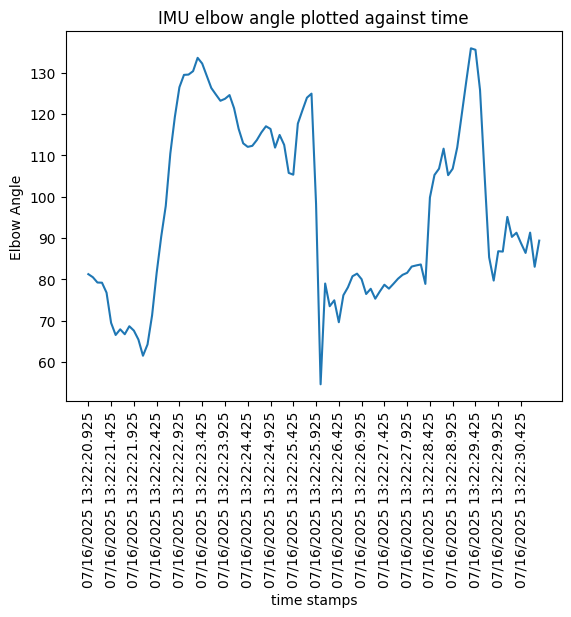

In [8]:
#Graphing results

import matplotlib.pyplot as plt

plt.plot(timestamps, angles)
plt.xlabel("time stamps")

#too many xlables, reduced to 1 in 10
x_index = [i for i in range(len(timestamps)) if i % 5 == 0]
x_labels = [timestamps[i] for i in x_index]
plt.xticks(x_index, x_labels, rotation=90)

plt.ylabel("Elbow Angle")
plt.title("IMU elbow angle plotted against time")
plt.show()

#add code to plot CV angle results next to quaternion angle results

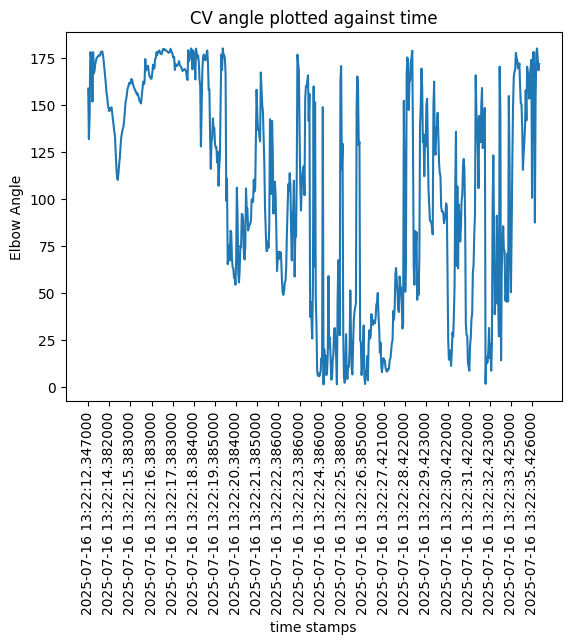

In [9]:
plt.plot(CV_time_stamps, CV_angles)
plt.xlabel("time stamps")

x_index = [i for i in range(len(CV_time_stamps)) if i % 30 == 0]
x_labels = [CV_time_stamps[i] for i in x_index]
plt.xticks(x_index, x_labels, rotation=90)


plt.ylabel("Elbow Angle")
plt.title("CV angle plotted against time")
plt.show()

CV timestamps in datetime [datetime.datetime(2025, 7, 16, 13, 22, 12, 347000), datetime.datetime(2025, 7, 16, 13, 22, 12, 680000), datetime.datetime(2025, 7, 16, 13, 22, 13, 149000), datetime.datetime(2025, 7, 16, 13, 22, 13, 481000), datetime.datetime(2025, 7, 16, 13, 22, 13, 513000), datetime.datetime(2025, 7, 16, 13, 22, 13, 547000), datetime.datetime(2025, 7, 16, 13, 22, 13, 580000), datetime.datetime(2025, 7, 16, 13, 22, 13, 614000), datetime.datetime(2025, 7, 16, 13, 22, 13, 647000), datetime.datetime(2025, 7, 16, 13, 22, 13, 680000), datetime.datetime(2025, 7, 16, 13, 22, 13, 714000), datetime.datetime(2025, 7, 16, 13, 22, 13, 748000), datetime.datetime(2025, 7, 16, 13, 22, 13, 780000), datetime.datetime(2025, 7, 16, 13, 22, 13, 815000), datetime.datetime(2025, 7, 16, 13, 22, 13, 847000), datetime.datetime(2025, 7, 16, 13, 22, 13, 880000), datetime.datetime(2025, 7, 16, 13, 22, 13, 914000), datetime.datetime(2025, 7, 16, 13, 22, 13, 948000), datetime.datetime(2025, 7, 16, 13, 22

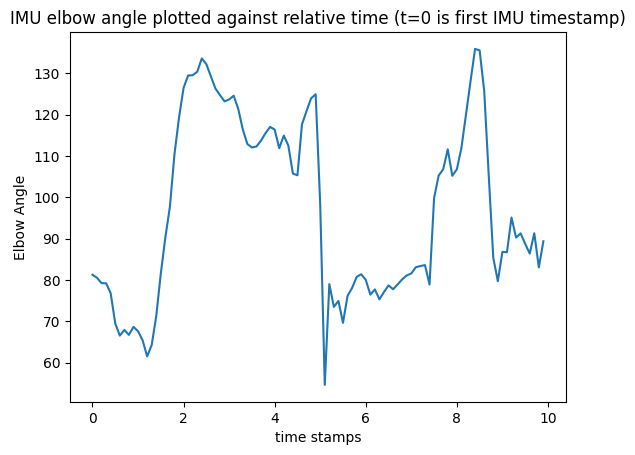

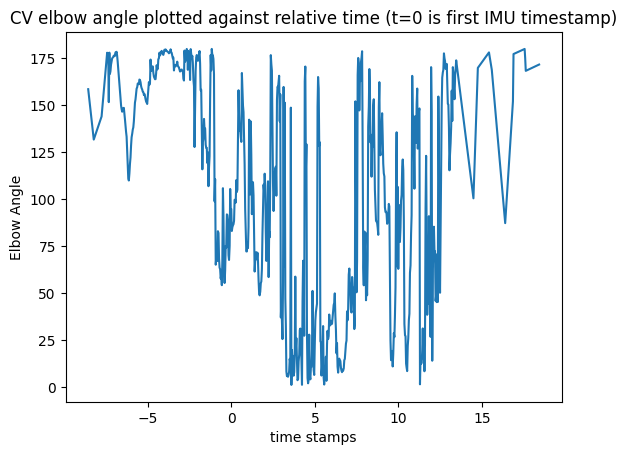

In [10]:
#converting IMU sensor and CV sensor timestamps into datetime format


#CV timestamps into datetime
CV_time_stamps_datetime = []

for i in CV_time_stamps:
    date_time = datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S.%f")
    CV_time_stamps_datetime.append(date_time)

print("CV timestamps in datetime", CV_time_stamps_datetime)


#IMU timestamps into datetime
IMU_time_stamps_datetime = []

for i in timestamps:
    date_time = datetime.datetime.strptime(i, "%m/%d/%Y %H:%M:%S.%f")
    IMU_time_stamps_datetime.append(date_time)

print("IMU timestamps in datetime", IMU_time_stamps_datetime)


#calculating relative time for CV and IMU timestamps

t0 = IMU_time_stamps_datetime[0] #t0 will be the first timestamp from the IMU sensor (ground truth)

relative_time_CV = [] 
for i in CV_time_stamps_datetime:
    rel_time = i - t0
    relative_time_CV.append(rel_time.total_seconds())

relative_time_IMU = []
for i in IMU_time_stamps_datetime:
    rel_time = i - t0
    relative_time_IMU.append(rel_time.total_seconds())


#plot of relative time IMU
plt.plot(relative_time_IMU, angles)
plt.xlabel("time stamps")
plt.ylabel("Elbow Angle")
plt.title("IMU elbow angle plotted against relative time (t=0 is first IMU timestamp)")
plt.show()

#plot of relative time CV
plt.plot(relative_time_CV, CV_angles)
plt.xlabel("time stamps")
plt.ylabel("Elbow Angle")
plt.title("CV elbow angle plotted against relative time (t=0 is first IMU timestamp)")
plt.show()

3350.810184054613
[[4208.164364025, -4.0], [4151.844903039705, -3.919191919191919], [4245.674995977591, -3.8383838383838382], [4196.997246745391, -3.757575757575758], [4118.291732238564, -3.676767676767677], [4455.32914360323, -3.595959595959596], [4235.116046486872, -3.515151515151515], [4340.323978245754, -3.4343434343434343], [4052.2810114665567, -3.3535353535353534], [4130.49054298078, -3.2727272727272725], [4572.925692794162, -3.191919191919192], [4450.456848465193, -3.111111111111111], [4529.587025281607, -3.0303030303030303], [4106.777204904868, -2.9494949494949494], [4196.086200406763, -2.8686868686868685], [4259.870868725833, -2.787878787878788], [4311.970556084935, -2.7070707070707067], [4457.948216165189, -2.6262626262626263], [4224.5306747747, -2.5454545454545454], [4517.766274212626, -2.4646464646464645], [4462.231865976159, -2.3838383838383836], [4680.153231521792, -2.3030303030303028], [4923.66540807214, -2.2222222222222223], [4945.1620412785815, -2.141414141414141], [49

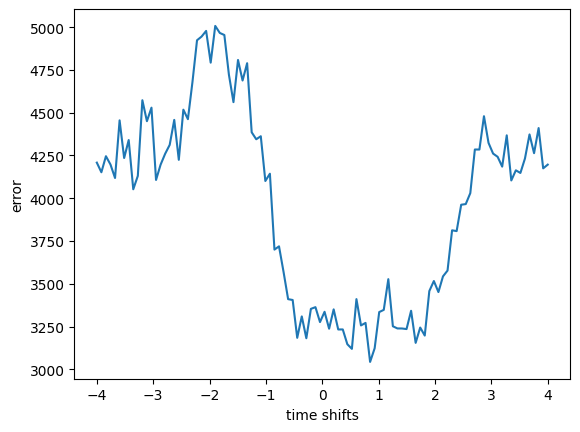

In [ ]:
"""CV angles interpolated on IMU time axis. Each angle coincides with a relative 
time frame from IMU time axis"""

#Calculating MSE of time shift 0 (original time)
CV_interp = np.interp(relative_time_IMU, relative_time_CV, CV_angles)
MSE = np.mean((CV_interp - angles) ** 2)
print(MSE) 


#time shift
time_shifts = np.linspace(-4,4,100)

MSE_time_shifts = []
for i in time_shifts:
    time_shifted = []

    for k in relative_time_CV:
        time_shifted.append(k + i) #add the shift to each time value

    CV_interp = np.interp(relative_time_IMU, time_shifted, CV_angles) #interpolate computer vision angle and time onto IMU time
    
    MSE = np.mean((CV_interp - angles) ** 2)

    MSE_time_shifts.append([MSE, i])


#getting time shifts and errors into seperate arrays from MSE_time_shifts array
time_shifts_seperated = []
errors_seperated = []

for i in MSE_time_shifts:
    errors_seperated.append(i[0])
    time_shifts_seperated.append(i[1])

plt.plot(time_shifts_seperated, errors_seperated)
plt.xlabel("time shifts")
plt.ylabel("error")
plt.show()